In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json  # for json files
import numpy as np
from plots import plot_histogram
from datetime import datetime
from scipy.fftpack import fft

In [19]:
data = pd.read_csv("resampled/qaserver_resampled.csv")
data = data.drop(['swap_free',"swap_total","actual_used_bytes","actual_used_pct","swap_norm"], axis=1)
data

,@timestamp,cores,user_pct,idle_pct,system_pct,free,swap,bytes_total,bytes_total_norm,out_bytes,out_bytes_norm,in_bytes,in_bytes_norm
0,2023-03-01 00:00:00,4,0.016037,0.965000,0.018963,2.000384e+10,0.200968,2.576876e+10,0.392488,0.000000e+00,0.000000,0.000000e+00,0.000000
1,2023-03-01 00:10:00,4,NaN,NaN,NaN,2.001253e+10,0.200976,2.576876e+10,0.392488,8.687552e+08,0.001072,6.638383e+08,0.004690
2,2023-03-01 00:20:00,4,0.003900,0.985150,0.010950,NaN,NaN,NaN,NaN,1.739137e+09,0.002147,1.328780e+09,0.009387
3,2023-03-01 00:30:00,4,NaN,NaN,NaN,2.000899e+10,0.200761,2.576876e+10,0.392488,5.800311e+08,0.000716,4.432566e+08,0.003131
4,2023-03-01 00:40:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.713257e+08,0.001075,6.658129e+08,0.004703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2023-03-31 23:10:00,4,0.001575,0.992950,0.005475,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
4460,2023-03-31 23:20:00,4,0.001175,0.994525,0.004300,2.001637e+10,0.193879,2.576876e+10,0.392488,6.789458e+08,0.000838,3.906981e+08,0.002760
4461,2023-03-31 23:30:00,4,NaN,NaN,NaN,2.001253e+10,0.193767,2.576876e+10,0.392488,NaN,NaN,NaN,NaN
4462,2023-03-31 23:40:00,4,NaN,NaN,NaN,1.999311e+10,0.194429,2.576876e+10,0.392488,NaN,NaN,NaN,NaN


In [194]:
# data = pd.read_csv("data_sample.csv")
# format = "%Y-%m-%dT%H:%M:%S.%fZ"
# data['@timestamp'] = data['@timestamp'].apply(lambda x: datetime.strptime(x, format))
# date_sorted = data.sort_values(by=['@timestamp'], ascending=True)
# date_sorted

,@timestamp,@version,event,host,system
62705,2023-03-01 00:00:10.315,1,{'dataset': 'system.cpu'},{'name': 'QASERVER'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.8984}, ..."
92957,2023-03-01 00:00:53.191,1,{'dataset': 'system.network'},{'name': 'PREPRODUCCION'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
9558,2023-03-01 00:00:57.822,1,{'dataset': 'system.network'},{'name': 'PRODUCCION'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
39952,2023-03-01 00:01:23.187,1,{'dataset': 'system.network'},{'name': 'PREPRODUCCION'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
76433,2023-03-01 00:01:25.922,1,{'dataset': 'system.memory'},{'name': 'PRUEBAS'},"{'memory': {'swap': {'total': 34355539968, 'fr..."
...,...,...,...,...,...
1789,2023-03-31 23:58:20.864,1,{'dataset': 'system.network'},{'name': 'PRUEBAS'},"{'network': {'out': {'bytes': 899796759}, 'in'..."
43685,2023-03-31 23:58:29.160,1,{'dataset': 'system.network'},{'name': 'PREPRODUCCION'},NaN
86646,2023-03-31 23:58:57.451,1,{'dataset': 'system.cpu'},{'name': 'PREPRODUCCION'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.858}, '..."
58672,2023-03-31 23:58:59.171,1,{'dataset': 'system.network'},{'name': 'PREPRODUCCION'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."


In [192]:
# date_sorted = pd.read_csv("resampled/qaserver_resampled.csv")
# # date_sorted

,@timestamp,cores,user_pct,idle_pct,system_pct,actual_used_bytes,actual_used_pct,swap_free,swap_total,free,swap,bytes_total,bytes_total_norm,swap_norm,out_bytes,out_bytes_norm,in_bytes,in_bytes_norm
0,2023-03-01 00:00:00,4,0.016037,0.965000,0.018963,5.764923e+09,0.2237,2.359289e+10,2.952686e+10,2.000384e+10,0.200968,2.576876e+10,0.392488,0.251732,0.000000e+00,0.000000,0.000000e+00,0.000000
1,2023-03-01 00:10:00,4,NaN,NaN,NaN,5.756232e+09,0.2234,2.359266e+10,2.952686e+10,2.001253e+10,0.200976,2.576876e+10,0.392488,0.251742,8.687552e+08,0.001072,6.638383e+08,0.004690
2,2023-03-01 00:20:00,4,0.003900,0.985150,0.010950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.739137e+09,0.002147,1.328780e+09,0.009387
3,2023-03-01 00:30:00,4,NaN,NaN,NaN,5.759775e+09,0.2235,2.359901e+10,2.952686e+10,2.000899e+10,0.200761,2.576876e+10,0.392488,0.251472,5.800311e+08,0.000716,4.432566e+08,0.003131
4,2023-03-01 00:40:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.713257e+08,0.001075,6.658129e+08,0.004703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2023-03-31 23:10:00,4,0.001575,0.992950,0.005475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
4460,2023-03-31 23:20:00,4,0.001175,0.994525,0.004300,5.752390e+09,0.2232,2.380221e+10,2.952686e+10,2.001637e+10,0.193879,2.576876e+10,0.392488,0.242852,6.789458e+08,0.000838,3.906981e+08,0.002760
4461,2023-03-31 23:30:00,4,NaN,NaN,NaN,5.756232e+09,0.2234,2.380553e+10,2.952686e+10,2.001253e+10,0.193767,2.576876e+10,0.392488,0.242711,NaN,NaN,NaN,NaN
4462,2023-03-31 23:40:00,4,NaN,NaN,NaN,5.775651e+09,0.2241,2.378598e+10,2.952686e+10,1.999311e+10,0.194429,2.576876e+10,0.392488,0.243541,NaN,NaN,NaN,NaN


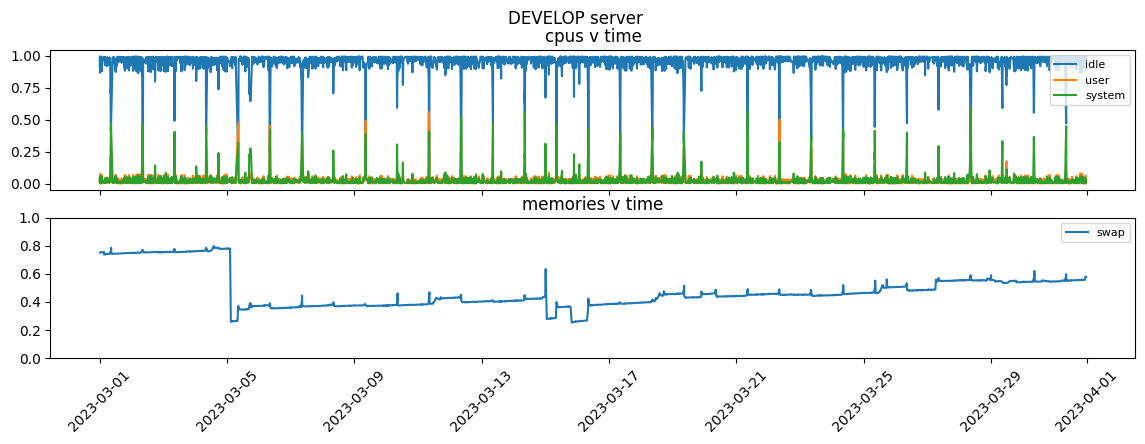

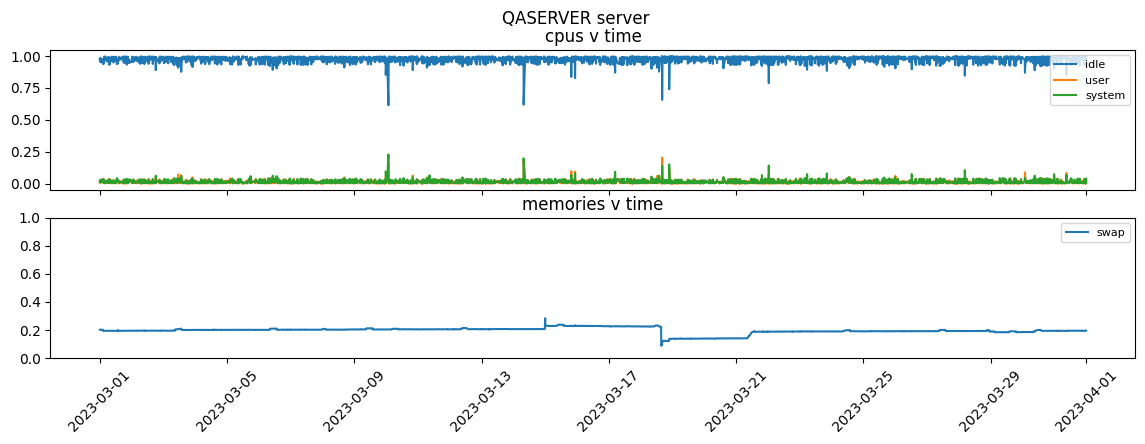

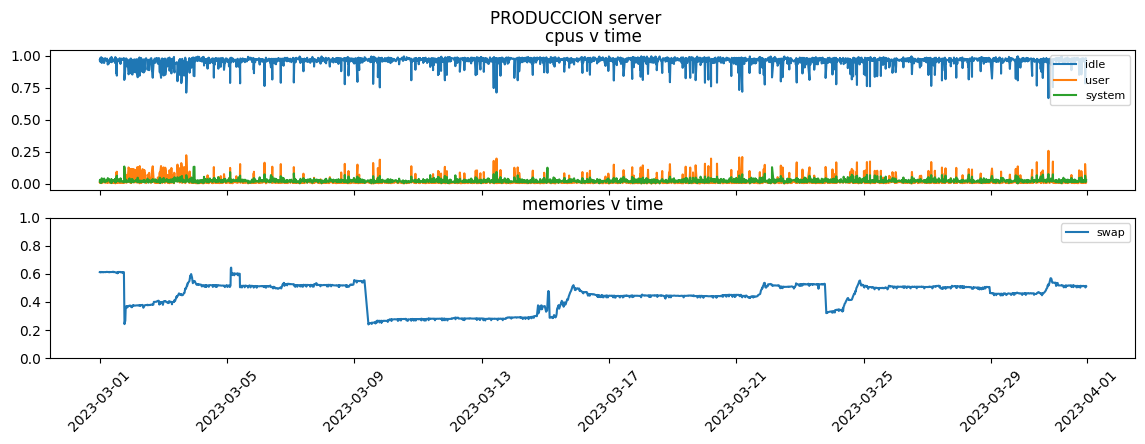

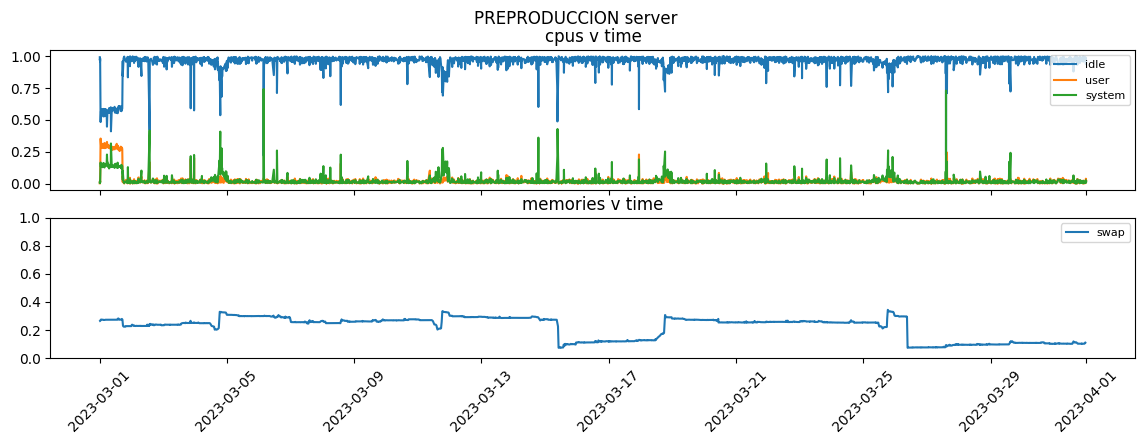

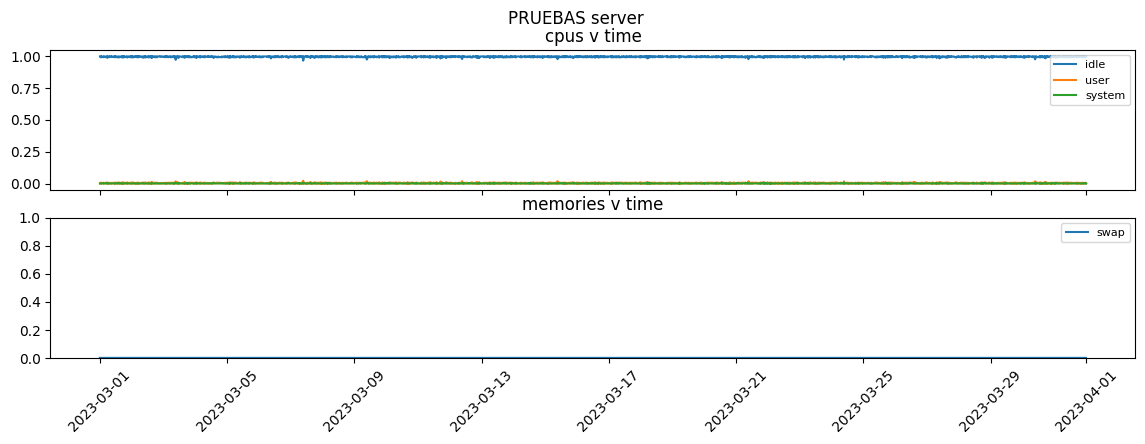

In [195]:
def process_network(network):
    out = network['out']['bytes']
    in_ = network['in']['bytes']
    return out, in_

def process_cpu(cpu):
    cores = cpu['cores']
    idle = cpu['idle']['pct'] / cores
    user = cpu['user']['pct'] / cores
    system = cpu['system']['pct'] / cores
    
    return idle, user, system

def process_memory(memory):
    total = memory['actual']['used']['bytes'] + memory['free']

    actual = 1 - memory['actual']['used']['bytes'] / total
    swap = 1 - (memory['swap']['free'] / memory['swap']['total'])

    return swap#, actual

def divide(x):
    # Divide datatypes
    networks = []
    network_times = []

    cpus = []
    cpus_times = []

    memories = []
    memories_times = []

    for i, row in x.iterrows():
        sys = row['system']
        time = row['@timestamp']

        if type(sys) == float:
            continue

        s = sys.replace("\'", "\"")
        s = read_json(s)
        data_type = list(s.keys())[0]

        if data_type == 'network':
            info = process_network(s['network'])
            networks.append(info)
            network_times.append(time)

        if data_type == 'cpu':
            info = process_cpu(s['cpu'])
            cpus.append(info)
            cpus_times.append(time)

        if data_type == 'memory':
            info = process_memory(s['memory'])
            memories.append(info)
            memories_times.append(time)
    return(networks,network_times,cpus,cpus_times,memories,memories_times)

def plot(name):

    # sample_name = "resampled/" + name + "_resampled.csv"

    # date_sorted = pd.read_csv(sample_name)

    tname = "{'name': '" + name + "'}"

    develop_server = date_sorted.loc[data.host == tname ]
    develop_server = develop_server.dropna(subset=['system'])
    networks,network_times,cpus,cpus_times,memories,memories_times = divide(develop_server)

    fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(14,4))
    fig.suptitle(name + " server")

    #ax1.plot(network_times, networks)
    #ax1.set_title("network v time")
    #ax1.legend(["out","in"], fontsize=8,loc='upper right')

    ax1.plot(cpus_times, cpus)
    ax1.set_title("cpus v time")
    ax1.legend(["idle","user","system"], fontsize=8,loc='upper right')

    ax2.plot(memories_times, memories)
    ax2.set_title("memories v time")
    ax2.legend(["swap", "actual", "free"], fontsize=8,loc='upper right')
    plt.ylim(0, 1)

    plt.xticks(rotation=45)

    plt.show()

def plots():
    hostnames = data["host"].unique()            # get unique names
    hostnames = list(map(read_json, hostnames))  # get json files
    hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])
    for i in range(5):
        plot(hostnames[i]["name"])

plots()